<a href="https://colab.research.google.com/github/gapself/pjatk/blob/main/WUM_Optymalizator%2C_funkcja_straty_i_early_stopping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science z Python 3.10. Optymalizator, funkcja straty i early stopping
## 🇬🇧 Data Science with Python 3.10. Optimizer, loss function and early stopping
#### 👨‍🏫 PhD Wojciech Oronowicz-Jaśkowiak
#### 🤖 https://github.com/aipogodzinach

Poniżej przedstawiony jest kod znany z poprzednich zajęć. Tym razem wprowadzimy do niego "ulepszenia" i zastanowimy się nad właściwym optymalizatorem i funkcją straty. Wprowadzimy również do naszego modelu podstawowy Early Stopping, który będzie zapobiegać przeuczeniu się naszego modelu.

### 1. Import bibliotek
#### 🇬🇧 Import libraries
W tym miejscu importujemy biblioteki, które będą nam potrzebne do wytrenowania sieci neuronowej. Jeżeli w tym miejscu widoczny będzie błąd, to konieczne jest zainstalowanie biblioteki w danym środowisku. W takim wypadku wchodzimy w terminal, aktywujemy środowisko pracy, instalujemy biblioteki (pip install X).

In [ ]:
!pip install mnist

import tensorflow as tf
import numpy as np
import mnist

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from matplotlib import pyplot
from tensorflow.keras.utils import to_categorical

from tensorflow import keras
from tensorflow.keras import backend as K

# Rozpoczynamy od importu potrzebnych nam bibliotek, nowością jest EarlyStopping

### 2. Przygotowanie danych do analizy
#### 🇬🇧 Data preparation

In [ ]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()
test_images = mnist.test_images()
test_labels = mnist.test_labels()

train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5

train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

model = Sequential([
  Dense(64, activation='relu', input_shape=(784,)),
  Dense(64, activation='relu'),
  Dense(10, activation='softmax'),
])

Zatrzymajmy się na chwilę w tym miejscu. Na ostatnich zajęciach modyfikowaliśmy architekturę sieci neuronowej. Teraz przyszedł czas na wybór odpowiedniego optymalizatora, metryk oraz funkcji straty.

In [51]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'],
)

### 3. Trenowanie modelu
#### 🇬🇧 Model training

### 📚 Zadanie 1.
##### Przeprowadź proces uczenia się z wykorzystaniem early stopping, wykonaj poniższe kroki.

1. Stwórz nową zmienną, którą nazwiesz f1, odwołaj się do early stopping, wprowadź odpowiednie wartości do parametrów takich jak monitor, mode, verbose oraz patience.
2. Stwórz nową zmienną, którą nazwiesz f2, odwołaj się do ModelCheckpoint, wprowadź nazwę dla swojego modelu oraz odpowiednie wartości dla parametru monitor, mode, verbose oraz save_best_only.
3. Stwórz nową zmienną, którą nazwiesz history. Zmienna ta powinna zawierać stworzone w poprzednim kroku dane treningowe (x), etykiety danych trningowych (y), dane testowe (a), etykiedy danych testowych (b) oraz odpowiednie wartości parametrów epochs oraz verbose.
4. Stwórz nową zmienną, którą nazwiesz trained_model, załaduj model używając nazwy modelu z punktu drugiego.
5. Stwórz nową zmienną, którą nazwiesz trai _accuracy, odwołaj się do trained_model.evaluate, użyj danych treningowych (x) oraz etykiet danych treningowych (y).
6. Stwórz nową zmienną, którą nazwiesz test_accuracy, odwołaj się do trained_model.evaluate, użyj danych testowych (a) oraz etykiet danych testowych (b).
7. Przeprowadź uczenie sieci dla liczby epok wynoszącej 100 przy wartości parametru patience wynoszącej 10. Po której epoce proces trenowania sieci się zatrzyma?


```
Proces trenowania zatrzymał się na 11 epoce, gdyż patience, to liczba epok bez poprawy, po których trening zostaje przerwany.

```


8. Wyświetl informacje dotyczące dokładności klasyfikacji na materiale treningowym oraz testowym.

In [63]:
#1
f1 = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

#2
f2 = ModelCheckpoint("Model2", mode="auto", monitor="val_loss", save_best_only=True, verbose=1)

#3
history = model.fit(train_images, train_labels, batch_size = None, validation_data = (test_images, test_labels)
, callbacks = [f1,f2], epochs=100,  verbose=1)

Epoch 1/100
1870/1875 [============================>.] - ETA: 0s - loss: 0.0336 - accuracy: 0.9887
Epoch 1: val_loss improved from inf to 0.11060, saving model to Model2
INFO:tensorflow:Assets written to: Model2/assets
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0335 - accuracy: 0.9887 - val_loss: 0.1106 - val_accuracy: 0.9734
Epoch 2/100
1867/1875 [============================>.] - ETA: 0s - loss: 0.0335 - accuracy: 0.9879
Epoch 2: val_loss did not improve from 0.11060
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0338 - accuracy: 0.9878 - val_loss: 0.1155 - val_accuracy: 0.9743
Epoch 3/100
1865/1875 [============================>.] - ETA: 0s - loss: 0.0317 - accuracy: 0.9892
Epoch 3: val_loss did not improve from 0.11060
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0319 - accuracy: 0.9892 - val_loss: 0.1194 - val_accuracy: 0.9708
Epoch 4/100
1859/1875 [============================>.] - ETA: 0s - loss: 0.0311 - accuracy

In [64]:
# #4
trained_model = load_model("Model2")

# #5
train_accuracy = trained_model.evaluate(train_images, train_labels)

# #6
test_accuracy = trained_model.evaluate(test_images, test_labels)

# #7
print(train_accuracy + test_accuracy)

  38/1875 [..............................] - ETA: 5s - loss: 0.0404 - accuracy: 0.9868

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


313/313 [==============================] - 1s 3ms/step - loss: 0.1106 - accuracy: 0.9734
[0.03002731315791607, 0.9894833564758301, 0.11059843748807907, 0.9733999967575073]


### 📚 Zadanie 2.
##### Uruchom ponownie proces treningu sieci, tym razem wprowadzając zmianę związaną z funkcją straty oraz optymalizatora.

1. Wypróbuj inną funkcję straty (rozkład Poisona). Czy w przypadku naszego zbioru danych taka funkcja ma sens?


```
W tym przypadku rozkład Poisona negatywnie wpłynął na wyniki, accuracy się znacznie pogorszyło spadło do ~ 0.1. Na epokach minimalnie się poprawił wynik i zakończył naukę na 18stej.
```

In [67]:
model.compile(
  optimizer='adam',
  loss='Poisson',
  metrics=['accuracy'],
)

#1
f1 = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

#2
f2 = ModelCheckpoint("Model2", mode="auto", monitor="val_loss", save_best_only=True, verbose=1)

#3
history = model.fit(train_images, train_labels, batch_size = None, validation_data = (test_images, test_labels)
, callbacks = [f1,f2], epochs=100,  verbose=1)

Epoch 1/100
1868/1875 [============================>.] - ETA: 0s - loss: 10.3523 - accuracy: 0.0912
Epoch 1: val_loss improved from inf to 10.33136, saving model to Model2
INFO:tensorflow:Assets written to: Model2/assets
1875/1875 [==============================] - 7s 4ms/step - loss: 10.3559 - accuracy: 0.0912 - val_loss: 10.3314 - val_accuracy: 0.0904
Epoch 2/100
1870/1875 [============================>.] - ETA: 0s - loss: 10.3558 - accuracy: 0.0905
Epoch 2: val_loss improved from 10.33136 to 10.33131, saving model to Model2
INFO:tensorflow:Assets written to: Model2/assets
1875/1875 [==============================] - 7s 3ms/step - loss: 10.3557 - accuracy: 0.0905 - val_loss: 10.3313 - val_accuracy: 0.0881
Epoch 3/100
1859/1875 [============================>.] - ETA: 0s - loss: 10.3586 - accuracy: 0.0919
Epoch 3: val_loss improved from 10.33131 to 10.33131, saving model to Model2
INFO:tensorflow:Assets written to: Model2/assets
1875/1875 [==============================] - 7s 3ms/step 

In [68]:
# #4
trained_model = load_model("Model2")

# #5
train_accuracy = trained_model.evaluate(train_images, train_labels)

# #6
test_accuracy = trained_model.evaluate(test_images, test_labels)

# #7
print(train_accuracy + test_accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 10.3313 - accuracy: 0.1177
[10.355558395385742, 0.11756666749715805, 10.331303596496582, 0.1177000030875206]


2. Wypróbuj inny optymalizator (z wykorzystaniem algorytmu Adadelta). Czy obserwujesz jakieś zmiany w procesie uczenia się w porównaniu do algorytmu wykorzystanego w tutorialu (adam)? Gdzie może leżeć przyczyna tych różnic? (zob. https://keras.io/api/optimizers/adadelta).



  > Optymalizatory to algorytmy lub metody używane do zmiany atrybutów sieci neuronowej, takich jak wagi i szybkość uczenia się, w celu zmniejszenia strat.

  > Przy użyciu optimizer='adadelta' proces uczenia postępuje z poprawą straty o 0,0001 na każdej epoce. Proces się przez to dłuży a poprawa jest nieznaczna. Poza tym nie wpływa to w praktycznie żaden sposób na accuracy, które stoi w miejscu i wynosi ~ 0.1.

  >  optimizer='adam' jest używany do przyspieszenia algorytmu opadania gradientu poprzez uwzględnienie „wykładniczo ważonej średniej” gradientów. Użycie średnich sprawia, że ​​algorytm zbliża się do minimów w szybszym tempie. Jeśli chce się szkolić sieć neuronową w krótszym czasie i bardziej efektywnie to należy wybrać alg Adam.






In [76]:
model.compile(
  optimizer='adadelta',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'],
)

In [77]:
#1
f1 = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
#2
f2 = ModelCheckpoint("Model3", mode="auto", monitor="val_loss", save_best_only=True, verbose=1)
#3
history = model.fit(train_images, train_labels, batch_size = None, validation_data = (test_images, test_labels)
, callbacks = [f1,f2], epochs=100,  verbose=1)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1863/1875 [============================>.] - ETA: 0s - loss: 2.3026 - accuracy: 0.1069
Epoch 1: val_loss improved from inf to 2.30257, saving model to Model3
INFO:tensorflow:Assets written to: Model3/assets
1875/1875 [==============================] - 8s 4ms/step - loss: 2.3026 - accuracy: 0.1069 - val_loss: 2.3026 - val_accuracy: 0.1135
Epoch 2/100
1873/1875 [============================>.] - ETA: 0s - loss: 2.3026 - accuracy: 0.1124
Epoch 2: val_loss improved from 2.30257 to 2.30256, saving model to Model3
INFO:tensorflow:Assets written to: Model3/assets
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3026 - accuracy: 0.1124 - val_loss: 2.3026 - val_accuracy: 0.1135
Epoch 3/100
1863/1875 [============================>.] - ETA: 0s - loss: 2.3026 - accuracy: 0.1123
Epoch 3: val_loss improved from 2.30256 to 2.30255, saving model to Model3
INFO:tensorflow:Assets written to: Model3/assets
1875/1875 [==============================] - 8s 4ms/step - loss: 2.3026 - accurac

In [78]:
# #4
trained_model = load_model("Model3")
# #5
train_accuracy = trained_model.evaluate(train_images, train_labels)
# #6
test_accuracy = trained_model.evaluate(test_images, test_labels)
# #7
print(train_accuracy + test_accuracy)

  44/1875 [..............................] - ETA: 4s - loss: 2.3015 - accuracy: 0.1151

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


313/313 [==============================] - 1s 3ms/step - loss: 2.3018 - accuracy: 0.1135
[2.3018200397491455, 0.11236666887998581, 2.301774501800537, 0.11349999904632568]


### 📚 Zadanie 3.
##### Niekiedy przydaje nam się możliwość wprowadzenia modyfikacji do funkcji straty lub zbudowania własnej funkcji straty od postaw. W Keras/Tensorflow jest to dosyć prosta rzecz, którą możemy zrealizować za pomocą podstawowych operacji.

Poniższy przykład ilustruje w jaki sposób możemy skorzystać z funkcji straty Root Mean Square Error (RMSE) dla dwóch zmiennych (y_true i y_pred).

In [79]:
y_true = 43.2
y_pred = 4.2

In [80]:
x = tf.keras.metrics.RootMeanSquaredError()
x(y_true, y_pred).numpy()

39.0

Czasami jednak możemy chcieć stworzyć naszą własną funkcję straty (podajemy przy tym dwa argumenty, tj. y_true oraz y_pred).

Odtwórz wskazaną wcześniej funkcję straty Root Mean Squared Error tworząc od podstaw nową funkcję.

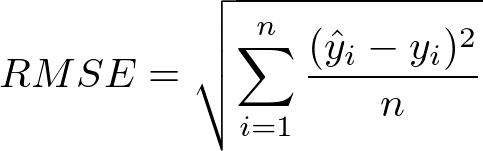

In [92]:
import math

def custom_loss_function(y_true, y_pred):
  mse = np.square(np.subtract(y_true,y_pred)).mean() 
  rmse = math.sqrt(mse)
  return rmse

print(custom_loss_function([1,2,3],[1,3,4]))

0.816496580927726
